<a href="https://colab.research.google.com/github/sc7-cloud/TFG---GOOGLE-COLAB-C-DIGOS-/blob/main/Analisis_de_las_Canciones_BUENO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import files
import pandas as pd


uploaded = files.upload()


df = pd.read_excel(next(iter(uploaded)))


df.head()



Saving CANCIONES.xlsx to CANCIONES.xlsx


,Nombre Canción,Artistas,Spotify ID,Posición Diaria,Movimiento Diario,Mmovimiento Semanal,País,fecha dato registrado,Popularidad,Explícito,...,Tono,Volumen,Modo,Nivel Hablado,Acústica,Instrumentalidad,Viveza,Valencia,Tempo,Compás
0,Gata Only,"FloyyMenor, Cris Mj",6XjDF6nds4DE2BBbagZol6,1,1,2,AR,2024-03-06,91,True,...,8,-8472.0,0,0.0509,0.4460,0.000024,0.0899,0.669,99986.0,4
1,HOLA PERDIDA,"Luck Ra, KHEA",7JKptWv4YXmievid0HajID,2,-1,-1,AR,2024-03-06,78,False,...,2,-5861.0,0,0.0859,0.1820,0.000000,0.7440,0.572,154932.0,4
2,Una Foto Remix (feat. Emilia),"Mesita, Nicki Nicole, Tiago PZK, Emilia",1kqH58eGh2ZTOHwqBIB2tM,3,0,-1,AR,2024-03-06,91,False,...,6,-3667.0,1,0.0631,0.3130,0.000000,0.0784,0.739,96033.0,4
3,Piel,"Tiago PZK, Ke Personajes",4wS0TnQzVkY9ML1BPKpOk1,4,0,0,AR,2024-03-06,83,True,...,0,-1617.0,1,0.0593,0.4220,0.000000,0.1400,0.816,168004.0,4
4,Por Mil Noches,Airbag,10zSgbysU2KyVTrcRmtu62,39,9,11,AR,2024-03-07,74,False,...,1,-7489.0,0,0.0291,0.0169,0.000054,0.1860,0.285,111963.0,4


In [ ]:


numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns


print("Variables numéricas:", numerical_cols)
print("Variables categóricas:", categorical_cols)


Variables numéricas: Index(['Posición Diaria', 'Movimiento Diario ', 'Mmovimiento Semanal ',
       'Popularidad', 'Duración ms', 'Bailabilidad', 'Energía', 'Tono',
       'Volumen', 'Modo', 'Nivel Hablado', 'Acústica', 'Instrumentalidad',
       'Viveza', 'Valencia', 'Tempo', 'Compás'],
      dtype='object')
Variables categóricas: Index(['Nombre Canción', 'Artistas', 'Spotify ID', 'País', 'Nombre del Album'], dtype='object')


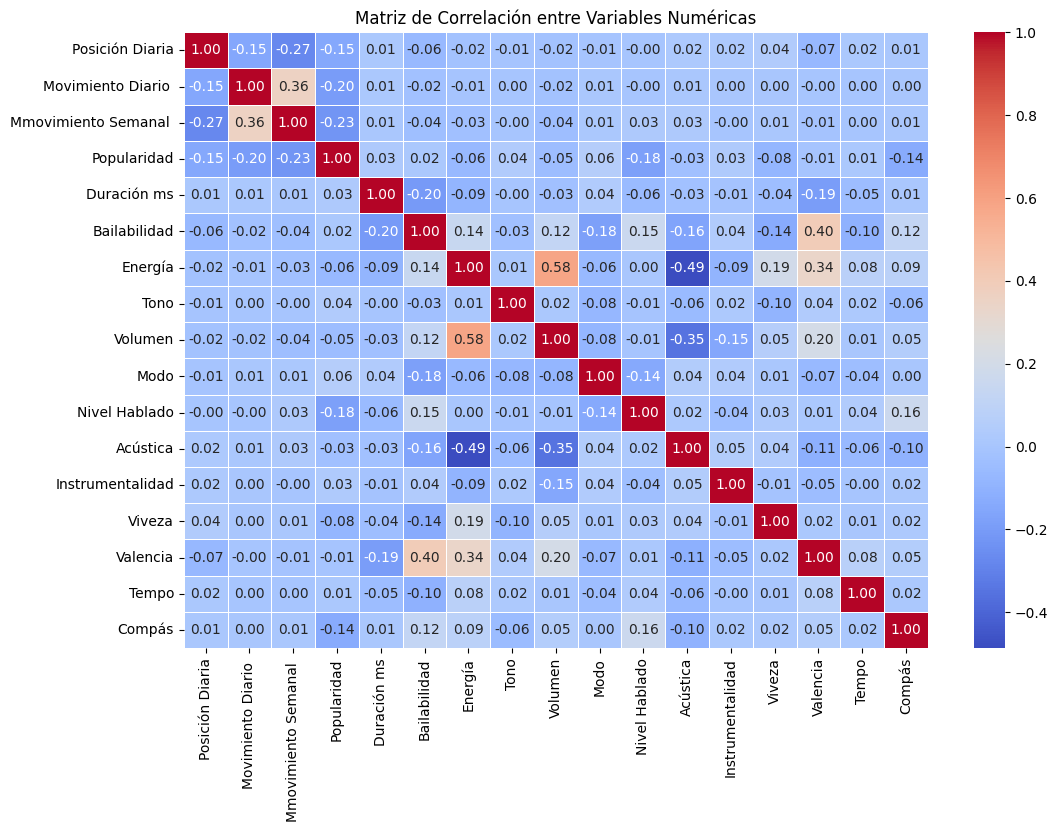

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = df[['Posición Diaria', 'Movimiento Diario ', 'Mmovimiento Semanal ',
                          'Popularidad', 'Duración ms', 'Bailabilidad', 'Energía', 'Tono',
                          'Volumen', 'Modo', 'Nivel Hablado', 'Acústica', 'Instrumentalidad',
                          'Viveza', 'Valencia', 'Tempo', 'Compás']].corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()


In [ ]:


missing_values = df.isnull().sum()


print("Valores nulos por columna:")
print(missing_values[missing_values > 0])


Valores nulos por columna:
Nombre del Album           160
Fecha Lanzamineto Album    119
dtype: int64


In [ ]:

df_cleaned.rename(columns={'Nombre del Album ': 'Nombre del Album'}, inplace=True)


df_cleaned['Nombre del Album'] = df_cleaned['Nombre del Album'].fillna('Desconocido')
df_cleaned['Fecha Lanzamineto Album'] = df_cleaned['Fecha Lanzamineto Album'].fillna('Desconocido')


df_cleaned[['Nombre del Album', 'Fecha Lanzamineto Album']].head()


,Nombre del Album,Fecha Lanzamineto Album
0,Gata Only,2024-02-02 00:00:00
1,QUE NOS FALTE TODO,2024-02-02 00:00:00
2,Una Foto Remix (feat. Emilia),2024-01-05 00:00:00
3,Piel,2024-02-01 00:00:00
4,Libertad,2013-11-27 00:00:00


In [ ]:

from scipy import stats
import numpy as np


z_scores = stats.zscore(df_cleaned[numerical_cols])


outliers = (np.abs(z_scores) > 3).all(axis=1)


outliers_df = df_cleaned[outliers]
print("Filas con outliers detectados:")
print(outliers_df)


Filas con outliers detectados:
Empty DataFrame
Columns: [Nombre Canción, Artistas, Spotify ID, Posición Diaria, Movimiento Diario , Mmovimiento Semanal , País, fecha dato registrado, Popularidad, Explícito, Duración ms, Nombre del Album, Fecha Lanzamineto Album, Bailabilidad, Energía, Tono, Volumen, Modo, Nivel Hablado, Acústica, Instrumentalidad, Viveza, Valencia, Tempo, Compás]
Index: []

[0 rows x 25 columns]


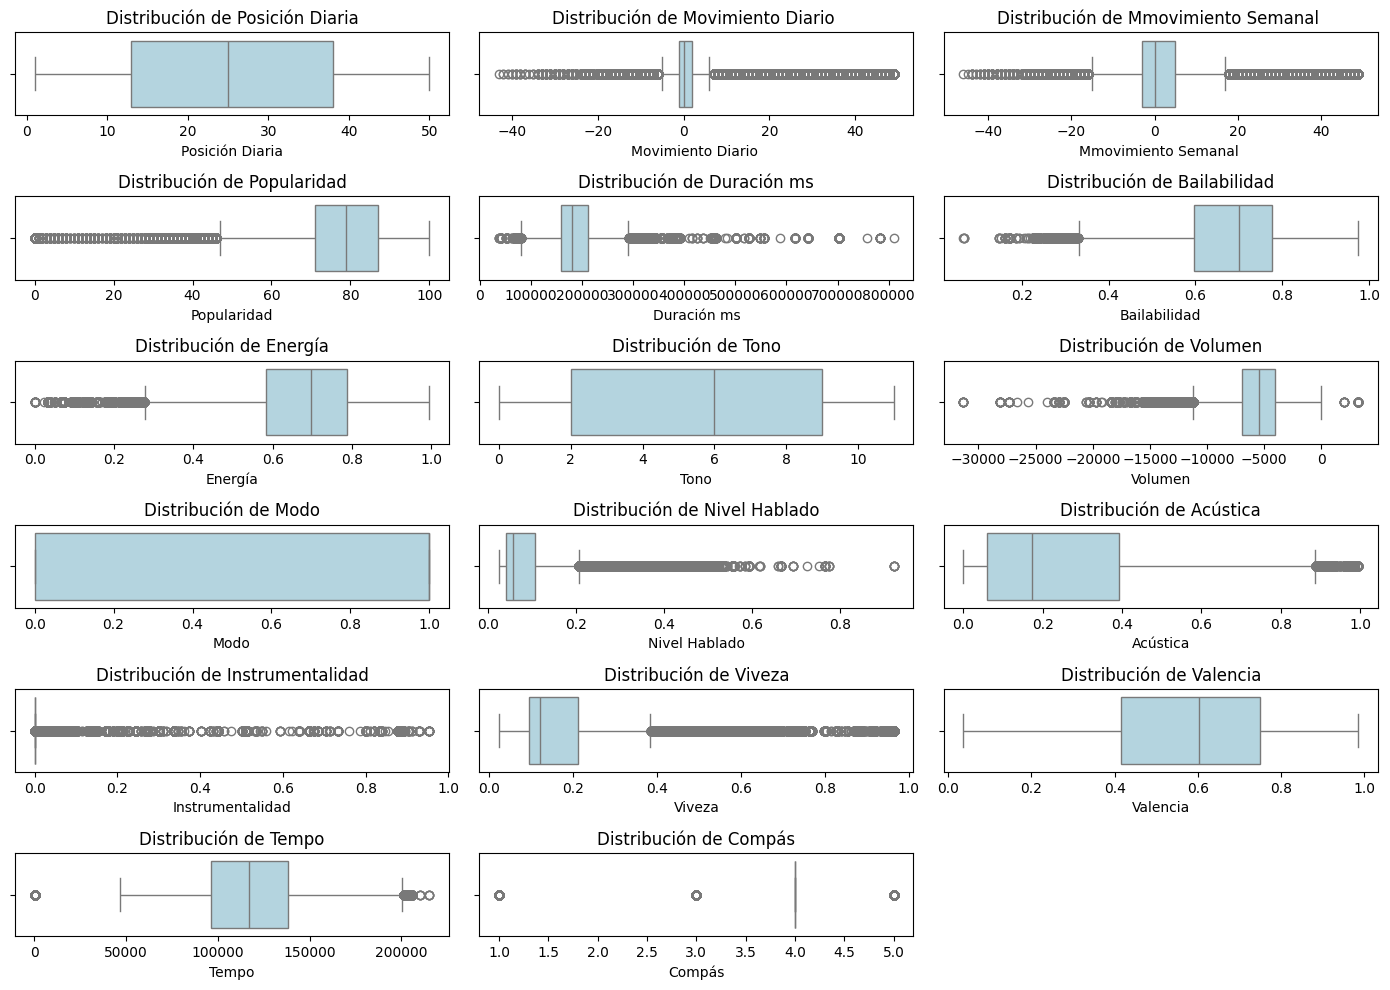

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 10))


for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i + 1)
    sns.boxplot(x=df_cleaned[col], color='lightblue', fliersize=6)
    plt.title(f"Distribución de {col}")
    plt.tight_layout()


plt.show()


In [ ]:

df.describe()



,Posición Diaria,Movimiento Diario,Mmovimiento Semanal,fecha dato registrado,Popularidad,Duración ms,Fecha Lanzamineto Album,Bailabilidad,Energía,Tono,Volumen,Modo,Nivel Hablado,Acústica,Instrumentalidad,Viveza,Valencia,Tempo,Compás
count,214974.000000,214974.000000,214974.000000,214974,214974.000000,214974.000000,214855,214974.000000,214974.000000,214974.000000,214974.000000,214974.000000,214974.000000,214974.000000,214974.000000,214974.000000,214974.000000,214974.000000,214974.000000
mean,25.496404,1.098407,2.889001,2024-07-31 10:04:12.599849472,78.236354,189470.373222,2022-10-24 14:35:25.634497536,0.680707,0.676731,5.535604,-5409.722795,0.559123,0.094100,0.246964,0.010419,0.177798,0.582176,111543.010393,3.899783
min,1.000000,-43.000000,-46.000000,2024-03-06 00:00:00,0.000000,37314.000000,1945-01-01 00:00:00,0.065700,0.000020,0.000000,-31321.000000,0.000000,0.024200,0.000008,0.000000,0.023200,0.036500,63.050000,1.000000
25%,13.000000,-1.000000,-3.000000,2024-05-20 00:00:00,71.000000,159636.000000,2023-11-03 00:00:00,0.598000,0.583000,2.000000,-6909.000000,0.000000,0.040000,0.060000,0.000000,0.095400,0.416000,96372.000000,4.000000
50%,25.000000,0.000000,0.000000,2024-07-31 00:00:00,79.000000,180385.000000,2024-04-03 00:00:00,0.701000,0.697000,6.000000,-5413.000000,1.000000,0.056900,0.174000,0.000000,0.122000,0.602000,117038.000000,4.000000
75%,38.000000,2.000000,5.000000,2024-10-10 00:00:00,87.000000,211978.000000,2024-06-21 00:00:00,0.776000,0.787000,9.000000,-4028.000000,1.000000,0.106000,0.391000,0.000024,0.211000,0.748000,138008.000000,4.000000
max,50.000000,49.000000,49.000000,2025-01-01 00:00:00,100.000000,810000.000000,2024-12-27 00:00:00,0.975000,0.995000,11.000000,3233.000000,1.000000,0.921000,0.995000,0.954000,0.964000,0.985000,215338.000000,5.000000
std,14.430689,7.445979,12.414976,NaN,12.733359,47569.512758,NaN,0.133300,0.158592,3.611048,2903.586214,0.496493,0.089821,0.225489,0.070772,0.142229,0.218686,44398.576425,0.384846


In [ ]:

print(df.head())
print(df.columns)


                  Nombre Canción                                 Artistas  \
0                      Gata Only                      FloyyMenor, Cris Mj   
1                   HOLA PERDIDA                            Luck Ra, KHEA   
2  Una Foto Remix (feat. Emilia)  Mesita, Nicki Nicole, Tiago PZK, Emilia   
3                           Piel                 Tiago PZK, Ke Personajes   
4                 Por Mil Noches                                   Airbag   

               Spotify ID  Posición Diaria  Movimiento Diario   \
0  6XjDF6nds4DE2BBbagZol6                1                   1   
1  7JKptWv4YXmievid0HajID                2                  -1   
2  1kqH58eGh2ZTOHwqBIB2tM                3                   0   
3  4wS0TnQzVkY9ML1BPKpOk1                4                   0   
4  10zSgbysU2KyVTrcRmtu62               39                   9   

   Mmovimiento Semanal  País fecha dato registrado  Popularidad  Explícito  \
0                     2   AR            2024-03-06           9

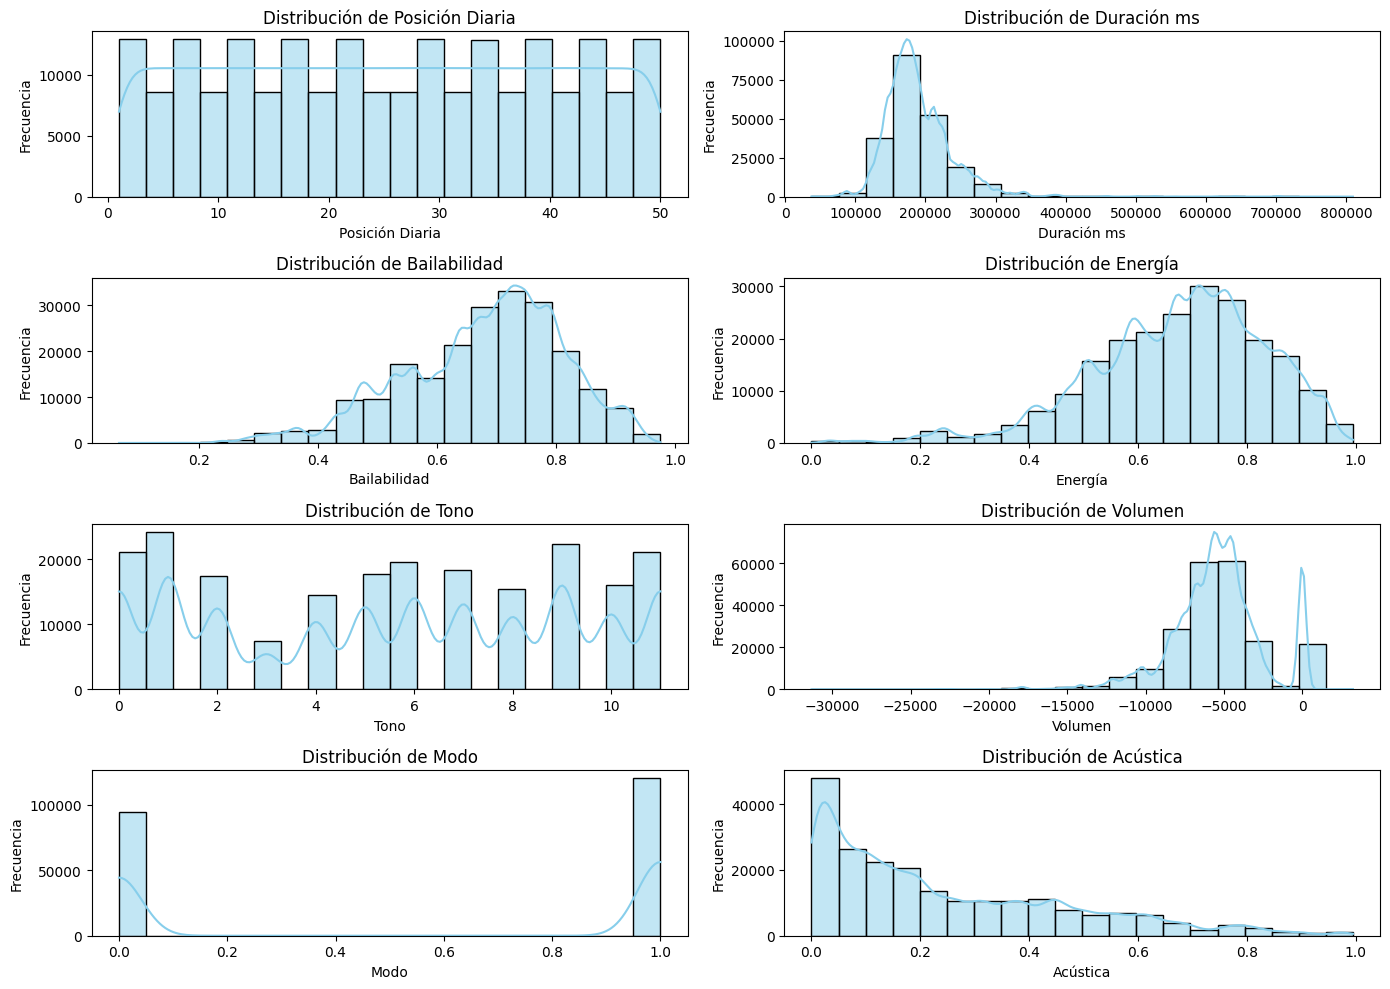

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


cols = ['Posición Diaria', 'Duración ms', 'Bailabilidad', 'Energía', 'Tono', 'Volumen', 'Modo', 'Acústica']


plt.figure(figsize=(14, 10))


for i, col in enumerate(cols):
    plt.subplot(4, 2, i + 1)
    sns.histplot(df[col], kde=True, color='skyblue', bins=20)
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


In [ ]:
from scipy import stats
import numpy as np


z_scores = stats.zscore(df[cols])


outliers = np.abs(z_scores) > 3


outliers_df = df[outliers.any(axis=1)]
print(f"Outliers detectados: {outliers_df}")


Outliers detectados:                  Nombre Canción  \
25           El Super Junte Rkt   
42         Cuarteto Sessions #3   
74           El Super Junte Rkt   
93         Cuarteto Sessions #3   
124          El Super Junte Rkt   
...                         ...   
214772  Something in the Orange   
214822  Something in the Orange   
214872  Something in the Orange   
214922  Something in the Orange   
214972  Something in the Orange   

                                                 Artistas  \
25      Gusty dj, Salastkbron, Callejero Fino, Alejo I...   
42                                              Q' Lokura   
74      Gusty dj, Salastkbron, Callejero Fino, Alejo I...   
93                                              Q' Lokura   
124     Gusty dj, Salastkbron, Callejero Fino, Alejo I...   
...                                                   ...   
214772                                         Zach Bryan   
214822                                         Zach Bryan   
214872   

In [ ]:

z_scores = stats.zscore(df[cols])


outliers = np.abs(z_scores) > 3


outliers_count = np.sum(outliers.any(axis=1))
print(f"Número total de canciones que son outliers: {outliers_count}")


Número total de canciones que son outliers: 5686


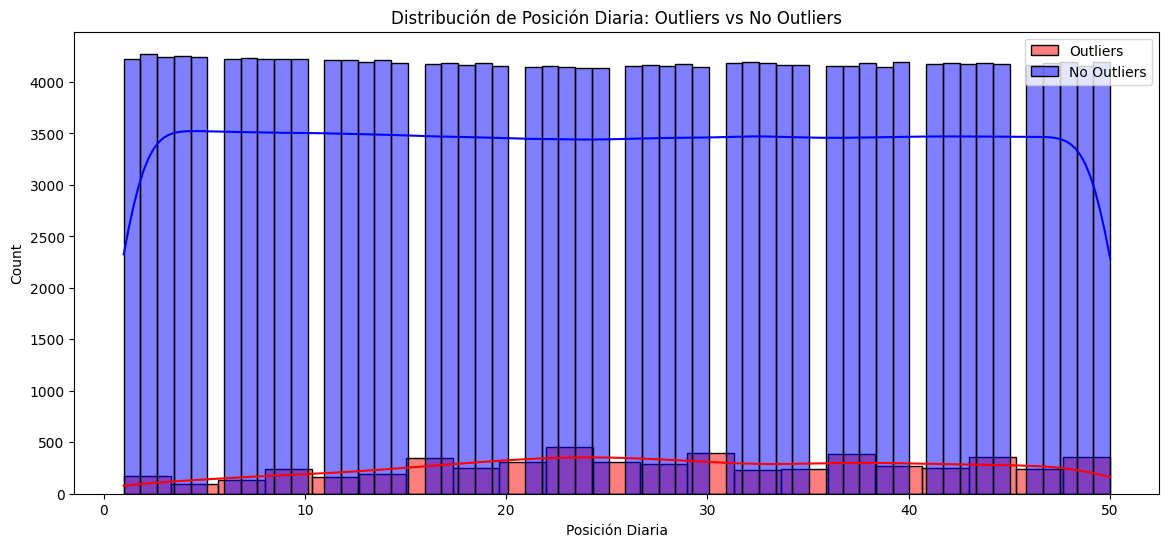

In [ ]:

df_outliers = df[outliers.any(axis=1)]
df_no_outliers = df[~outliers.any(axis=1)]


plt.figure(figsize=(14, 6))


sns.histplot(df_outliers['Posición Diaria'], kde=True, color='red', label='Outliers')
sns.histplot(df_no_outliers['Posición Diaria'], kde=True, color='blue', label='No Outliers')

plt.legend()
plt.title('Distribución de Posición Diaria: Outliers vs No Outliers')
plt.show()


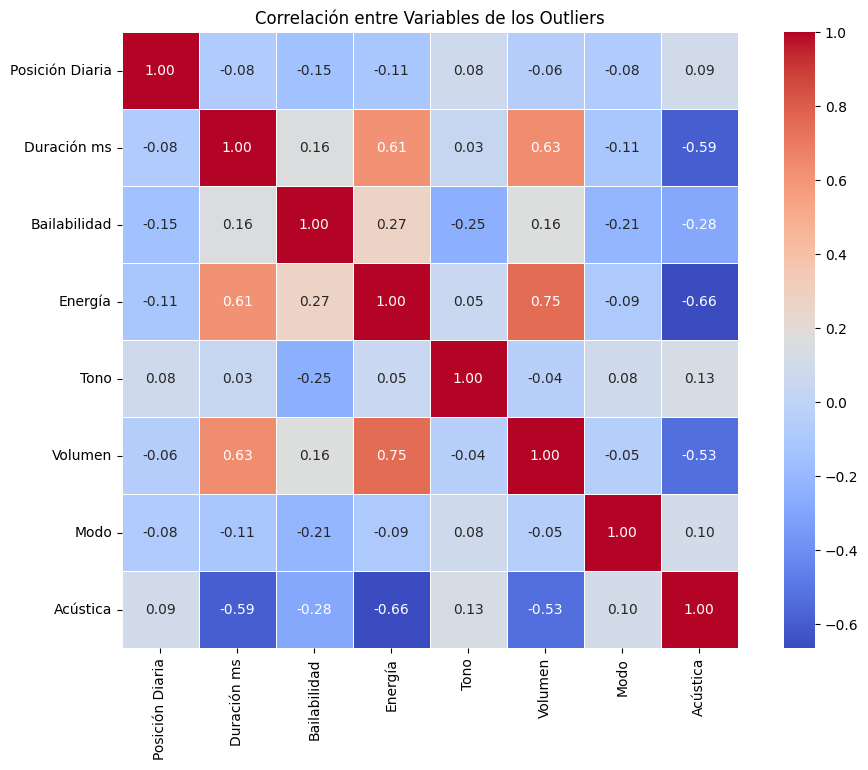

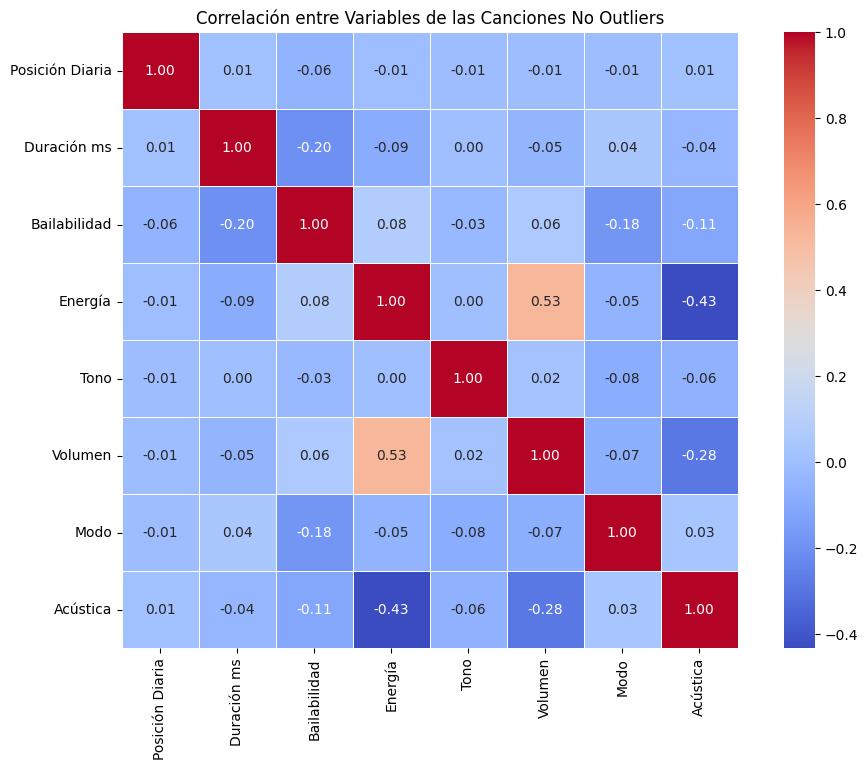

In [ ]:

outliers_corr = df_outliers[['Posición Diaria', 'Duración ms', 'Bailabilidad', 'Energía', 'Tono', 'Volumen', 'Modo', 'Acústica']].corr()
no_outliers_corr = df_no_outliers[['Posición Diaria', 'Duración ms', 'Bailabilidad', 'Energía', 'Tono', 'Volumen', 'Modo', 'Acústica']].corr()


plt.figure(figsize=(12, 8))
sns.heatmap(outliers_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True)
plt.title('Correlación entre Variables de los Outliers')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(no_outliers_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True)
plt.title('Correlación entre Variables de las Canciones No Outliers')
plt.show()


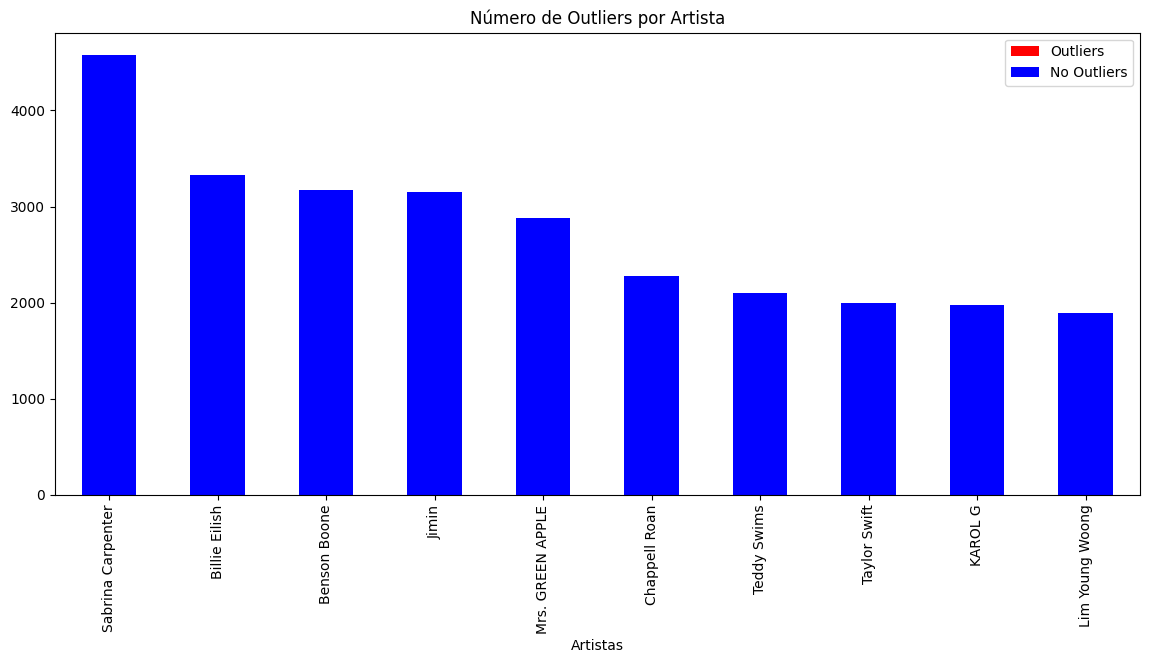

In [ ]:

outliers_artistas = df_outliers.groupby('Artistas')['Posición Diaria'].count()
no_outliers_artistas = df_no_outliers.groupby('Artistas')['Posición Diaria'].count()


plt.figure(figsize=(14, 6))
outliers_artistas.sort_values(ascending=False).head(10).plot(kind='bar', color='red', label='Outliers')
no_outliers_artistas.sort_values(ascending=False).head(10).plot(kind='bar', color='blue', label='No Outliers')

plt.legend()
plt.title('Número de Outliers por Artista')
plt.show()


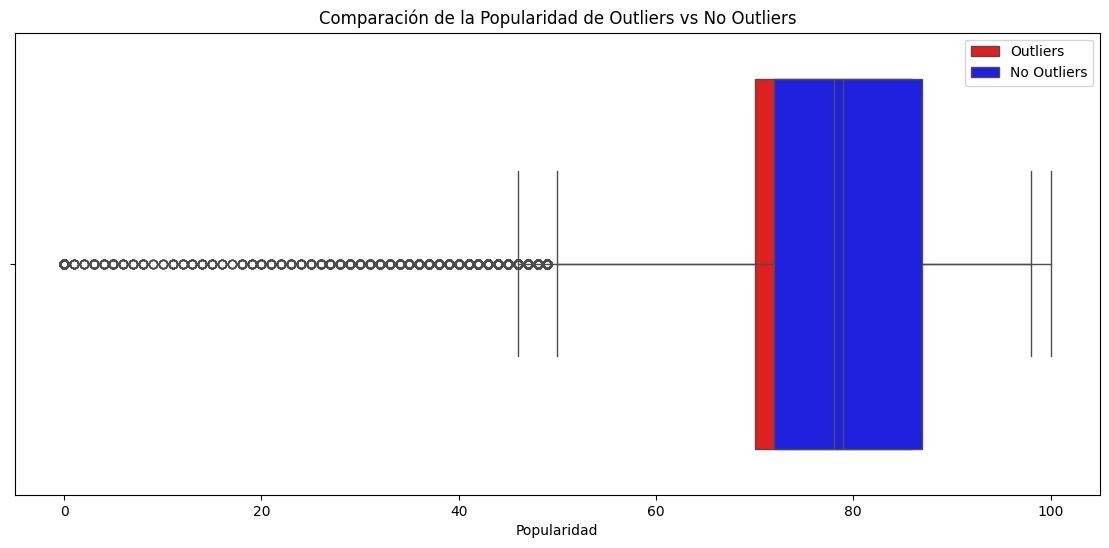

In [ ]:

plt.figure(figsize=(14, 6))
sns.boxplot(x='Popularidad', data=df_outliers, color='red', label='Outliers')
sns.boxplot(x='Popularidad', data=df_no_outliers, color='blue', label='No Outliers')
plt.legend()
plt.title('Comparación de la Popularidad de Outliers vs No Outliers')
plt.show()


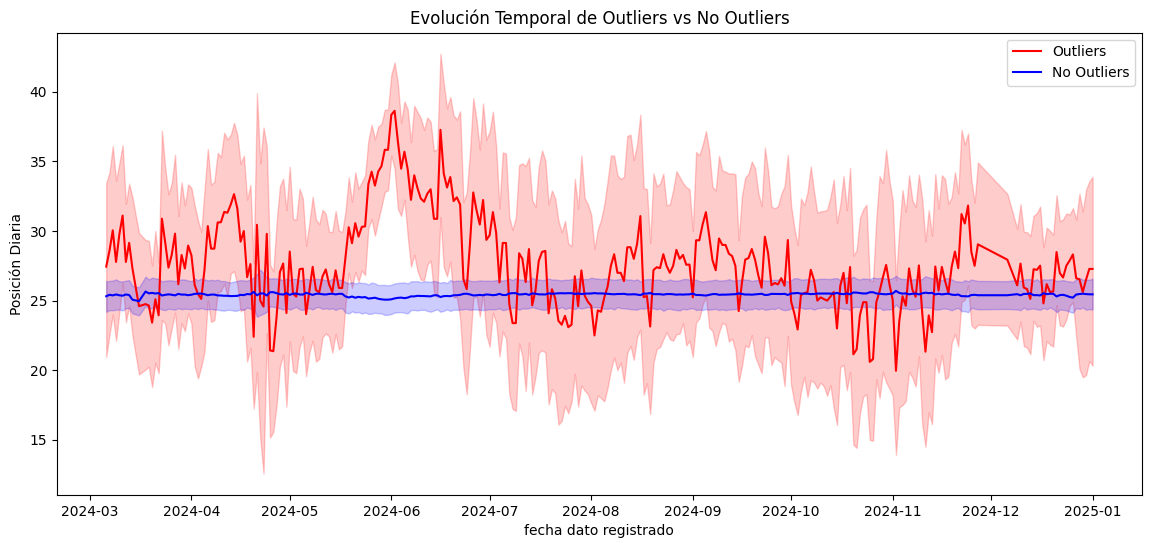

In [ ]:

plt.figure(figsize=(14, 6))
sns.lineplot(data=df_outliers, x='fecha dato registrado', y='Posición Diaria', label='Outliers', color='red')
sns.lineplot(data=df_no_outliers, x='fecha dato registrado', y='Posición Diaria', label='No Outliers', color='blue')
plt.title('Evolución Temporal de Outliers vs No Outliers')
plt.legend()
plt.show()


In [ ]:
import numpy as np


df['Duración ms'] = df['Duración ms'].fillna(df['Duración ms'].median())
df['Volumen'] = df['Volumen'].fillna(df['Volumen'].median())



df['Duración ms'] = np.log1p(df['Duración ms'])



df['Volumen'] = np.where(df['Volumen'] > 0, np.log1p(df['Volumen']), df['Volumen'])


df[['Nombre Canción', 'Duración ms', 'Volumen']].head()


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Nombre Canción,Duración ms,Volumen
0,Gata Only,12.310437,-8472.0
1,HOLA PERDIDA,12.022973,-5861.0
2,Una Foto Remix (feat. Emilia),12.404509,-3667.0
3,Piel,11.857082,-1617.0
4,Por Mil Noches,12.556325,-7489.0


In [ ]:

null_values = df.isnull().sum()


print(null_values)


Nombre Canción             0
Artistas                   0
Spotify ID                 0
Posición Diaria            0
Movimiento Diario          0
Mmovimiento Semanal        0
País                       0
fecha dato registrado      0
Popularidad                0
Explícito                  0
Duración ms                0
Nombre del Album           0
Fecha Lanzamineto Album    0
Bailabilidad               0
Energía                    0
Tono                       0
Volumen                    0
Modo                       0
Nivel Hablado              0
Acústica                   0
Instrumentalidad           0
Viveza                     0
Valencia                   0
Tempo                      0
Compás                     0
dtype: int64


In [ ]:

print(df.columns)


df.columns = df.columns.str.strip()


df['Nombre del Album'] = df['Nombre del Album'].fillna('Desconocido')
df['Fecha Lanzamineto Album'] = df['Fecha Lanzamineto Album'].fillna('Desconocido')


df[['Nombre Canción', 'Nombre del Album', 'Fecha Lanzamineto Album']].head()



Index(['Nombre Canción', 'Artistas', 'Spotify ID', 'Posición Diaria',
       'Movimiento Diario', 'Mmovimiento Semanal', 'País',
       'fecha dato registrado', 'Popularidad', 'Explícito', 'Duración ms',
       'Nombre del Album', 'Fecha Lanzamineto Album', 'Bailabilidad',
       'Energía', 'Tono', 'Volumen', 'Modo', 'Nivel Hablado', 'Acústica',
       'Instrumentalidad', 'Viveza', 'Valencia', 'Tempo', 'Compás'],
      dtype='object')


,Nombre Canción,Nombre del Album,Fecha Lanzamineto Album
0,Gata Only,Gata Only,2024-02-02 00:00:00
1,HOLA PERDIDA,QUE NOS FALTE TODO,2024-02-02 00:00:00
2,Una Foto Remix (feat. Emilia),Una Foto Remix (feat. Emilia),2024-01-05 00:00:00
3,Piel,Piel,2024-02-01 00:00:00
4,Por Mil Noches,Libertad,2013-11-27 00:00:00


In [ ]:

estadisticas_despues = df.describe()


estadisticas_despues



,Posición Diaria,Movimiento Diario,Mmovimiento Semanal,fecha dato registrado,Popularidad,Duración ms,Bailabilidad,Energía,Tono,Volumen,Modo,Nivel Hablado,Acústica,Instrumentalidad,Viveza,Valencia,Tempo,Compás
count,214974.000000,214974.000000,214974.000000,214974,214974.000000,214974.000000,214974.000000,214974.000000,214974.000000,214974.000000,214974.000000,214974.000000,214974.000000,214974.000000,214974.000000,214974.000000,214974.000000,214974.000000
mean,25.496404,1.098407,2.889001,2024-07-31 10:04:12.599849472,78.236354,12.124520,0.680707,0.676731,5.535604,-5410.616537,0.559123,0.094100,0.246964,0.010419,0.177798,0.582176,111543.010393,3.899783
min,1.000000,-43.000000,-46.000000,2024-03-06 00:00:00,0.000000,10.527151,0.065700,0.000020,0.000000,-31321.000000,0.000000,0.024200,0.000008,0.000000,0.023200,0.036500,63.050000,1.000000
25%,13.000000,-1.000000,-3.000000,2024-05-20 00:00:00,71.000000,11.980658,0.598000,0.583000,2.000000,-6909.000000,0.000000,0.040000,0.060000,0.000000,0.095400,0.416000,96372.000000,4.000000
50%,25.000000,0.000000,0.000000,2024-07-31 00:00:00,79.000000,12.102854,0.701000,0.697000,6.000000,-5413.000000,1.000000,0.056900,0.174000,0.000000,0.122000,0.602000,117038.000000,4.000000
75%,38.000000,2.000000,5.000000,2024-10-10 00:00:00,87.000000,12.264242,0.776000,0.787000,9.000000,-4028.000000,1.000000,0.106000,0.391000,0.000024,0.211000,0.748000,138008.000000,4.000000
max,50.000000,49.000000,49.000000,2025-01-01 00:00:00,100.000000,13.604791,0.975000,0.995000,11.000000,8.081475,1.000000,0.921000,0.995000,0.954000,0.964000,0.985000,215338.000000,5.000000
std,14.430689,7.445979,12.414976,NaN,12.733359,0.230712,0.133300,0.158592,3.611048,2901.438999,0.496493,0.089821,0.225489,0.070772,0.142229,0.218686,44398.576425,0.384846


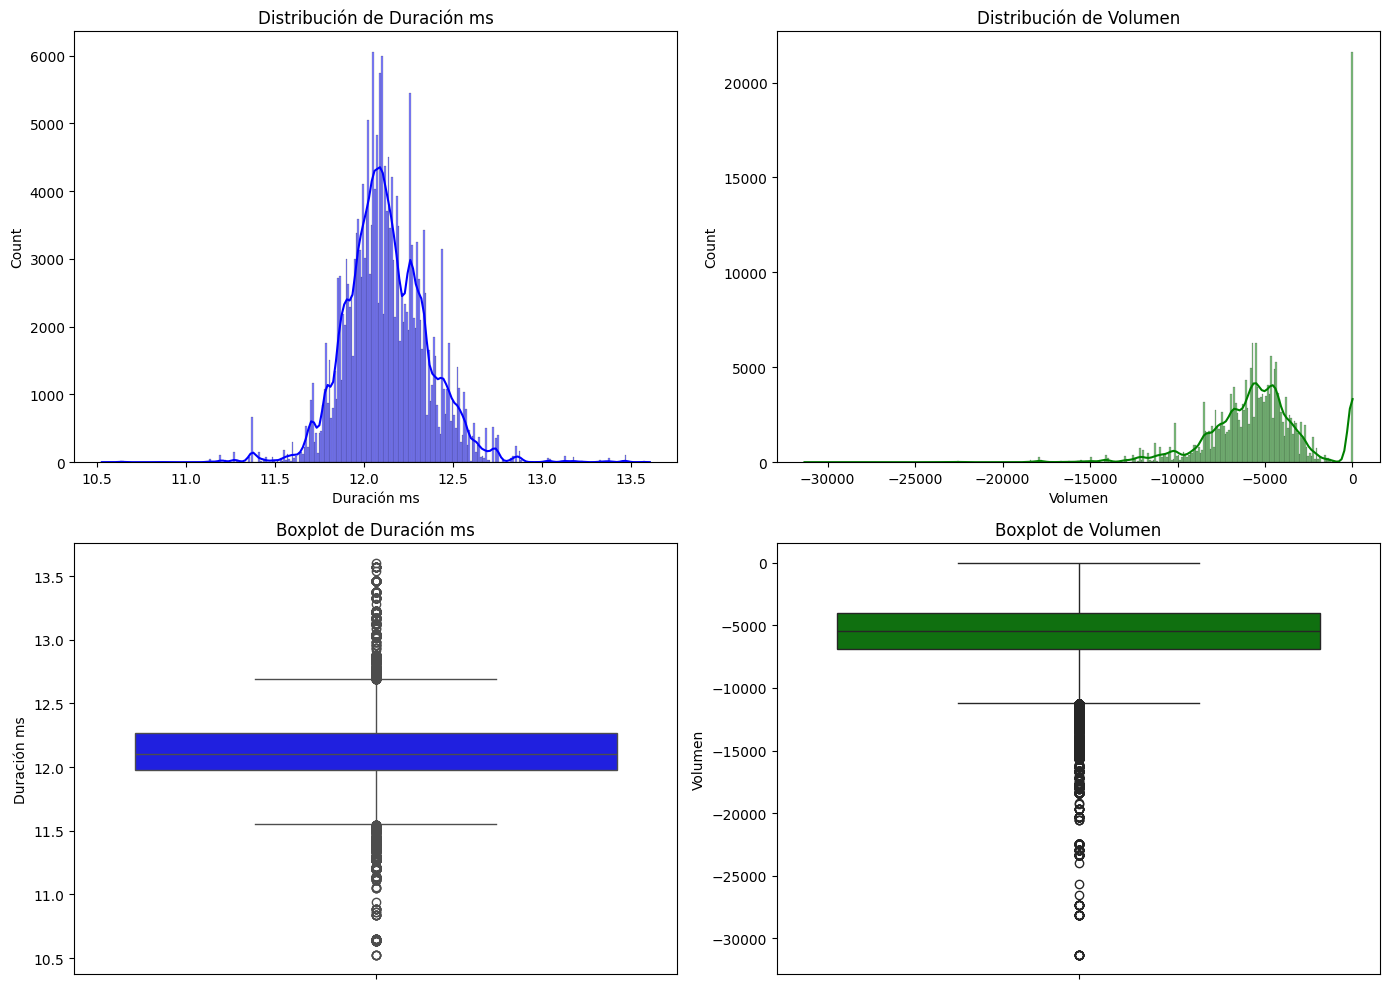

In [ ]:

fig, axes = plt.subplots(2, 2, figsize=(14, 10))


sns.histplot(df['Duración ms'], kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set(title='Distribución de Duración ms')


sns.histplot(df['Volumen'], kde=True, ax=axes[0, 1], color='green')
axes[0, 1].set(title='Distribución de Volumen')


sns.boxplot(data=df['Duración ms'], ax=axes[1, 0], color='blue')
axes[1, 0].set(title='Boxplot de Duración ms')


sns.boxplot(data=df['Volumen'], ax=axes[1, 1], color='green')
axes[1, 1].set(title='Boxplot de Volumen')

plt.tight_layout()
plt.show()



In [ ]:

variables_numericas = df.select_dtypes(include=[np.number]).columns


variables_categoricas = df.select_dtypes(include=[object]).columns


print("Variables Numéricas:")
print(variables_numericas)

print("\nVariables Categóricas:")
print(variables_categoricas)


Variables Numéricas:
Index(['Posición Diaria', 'Movimiento Diario', 'Mmovimiento Semanal',
       'Popularidad', 'Duración ms', 'Bailabilidad', 'Energía', 'Tono',
       'Volumen', 'Modo', 'Nivel Hablado', 'Acústica', 'Instrumentalidad',
       'Viveza', 'Valencia', 'Tempo', 'Compás'],
      dtype='object')

Variables Categóricas:
Index(['Nombre Canción', 'Artistas', 'Spotify ID', 'País', 'Nombre del Album',
       'Fecha Lanzamineto Album'],
      dtype='object')


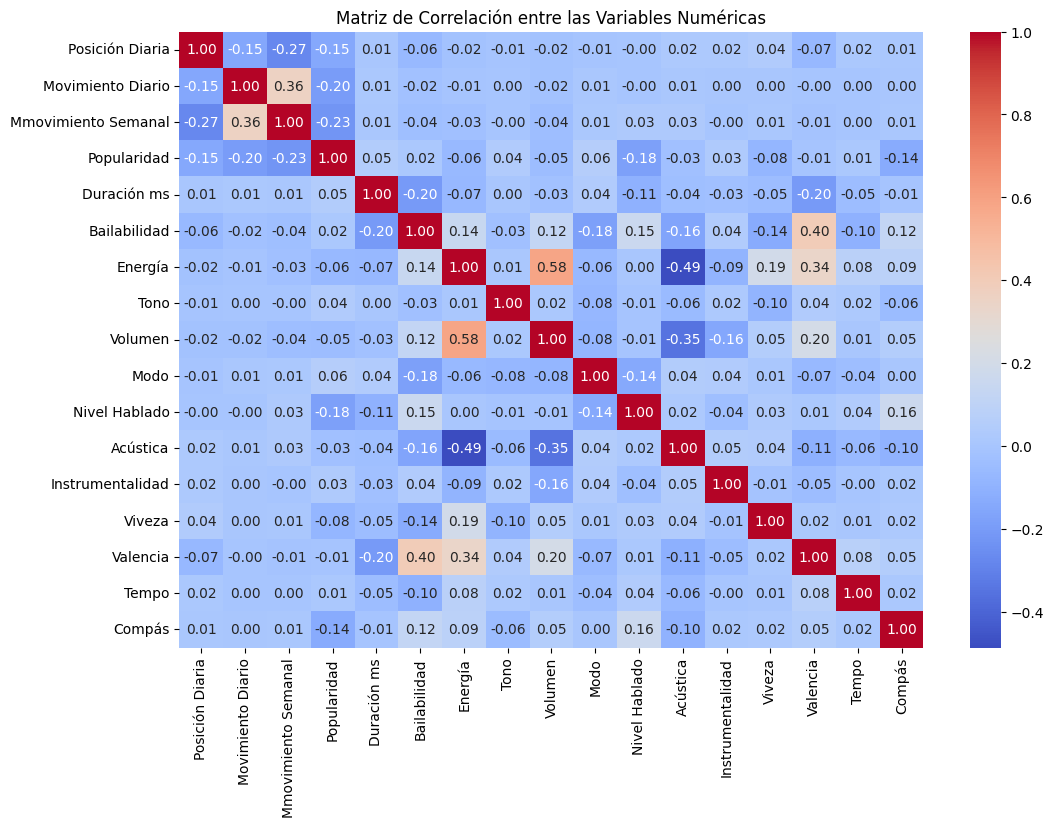

In [ ]:

df_numericas = df.select_dtypes(include=[np.number])


correlacion = df_numericas.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación entre las Variables Numéricas')
plt.show()


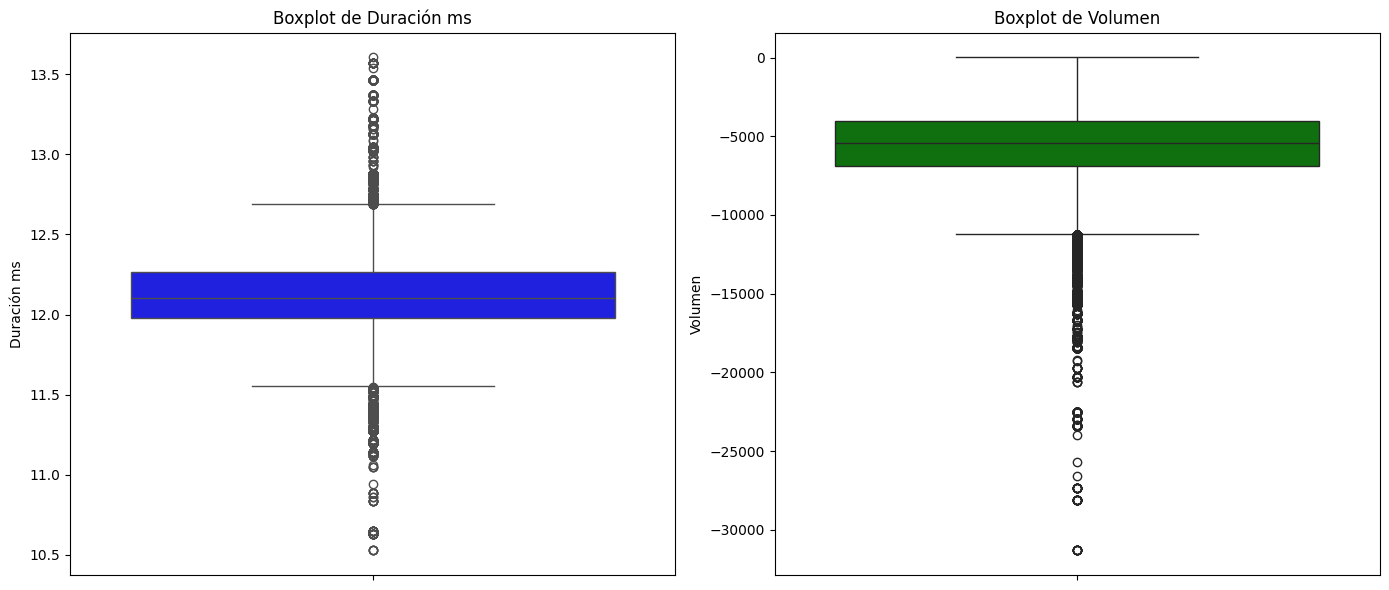

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6))


sns.boxplot(data=df['Duración ms'], ax=axes[0], color='blue').set(title='Boxplot de Duración ms')


sns.boxplot(data=df['Volumen'], ax=axes[1], color='green').set(title='Boxplot de Volumen')


plt.tight_layout()
plt.show()


In [ ]:

variables_numericas = df.select_dtypes(include=[np.number]).columns


print("Variables Numéricas:")
print(variables_numericas)


Variables Numéricas:
Index(['Posición Diaria', 'Movimiento Diario', 'Mmovimiento Semanal',
       'Popularidad', 'Duración ms', 'Bailabilidad', 'Energía', 'Tono',
       'Volumen', 'Modo', 'Nivel Hablado', 'Acústica', 'Instrumentalidad',
       'Viveza', 'Valencia', 'Tempo', 'Compás'],
      dtype='object')


In [ ]:

import pandas as pd


df = pd.read_excel('/content/CANCIONES.xlsx')


print(df.head())



                  Nombre Canción                                 Artistas  \
0                      Gata Only                      FloyyMenor, Cris Mj   
1                   HOLA PERDIDA                            Luck Ra, KHEA   
2  Una Foto Remix (feat. Emilia)  Mesita, Nicki Nicole, Tiago PZK, Emilia   
3                           Piel                 Tiago PZK, Ke Personajes   
4                 Por Mil Noches                                   Airbag   

               Spotify ID  Posición Diaria  Movimiento Diario   \
0  6XjDF6nds4DE2BBbagZol6                1                   1   
1  7JKptWv4YXmievid0HajID                2                  -1   
2  1kqH58eGh2ZTOHwqBIB2tM                3                   0   
3  4wS0TnQzVkY9ML1BPKpOk1                4                   0   
4  10zSgbysU2KyVTrcRmtu62               39                   9   

   Mmovimiento Semanal  País fecha dato registrado  Popularidad  Explícito  \
0                     2   AR            2024-03-06           9

In [ ]:

print(df.columns)


df.columns = df.columns.str.strip()


print(df.columns)


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


if 'Movimiento Diario' in df.columns and 'Mmovimiento Semanal' in df.columns:
    df['Movimiento Diario'] = scaler.fit_transform(df[['Movimiento Diario']])
    df['Mmovimiento Semanal'] = scaler.fit_transform(df[['Mmovimiento Semanal']])
else:
    print("Las columnas 'Movimiento Diario' o 'Mmovimiento Semanal' no están presentes en el DataFrame.")


Index(['Nombre Canción', 'Artistas', 'Spotify ID', 'Posición Diaria',
       'Movimiento Diario ', 'Mmovimiento Semanal ', 'País',
       'fecha dato registrado', 'Popularidad', 'Explícito', 'Duración ms',
       'Nombre del Album', 'Fecha Lanzamineto Album', 'Bailabilidad',
       'Energía', 'Tono', 'Volumen', 'Modo', 'Nivel Hablado', 'Acústica',
       'Instrumentalidad', 'Viveza', 'Valencia', 'Tempo', 'Compás'],
      dtype='object')
Index(['Nombre Canción', 'Artistas', 'Spotify ID', 'Posición Diaria',
       'Movimiento Diario', 'Mmovimiento Semanal', 'País',
       'fecha dato registrado', 'Popularidad', 'Explícito', 'Duración ms',
       'Nombre del Album', 'Fecha Lanzamineto Album', 'Bailabilidad',
       'Energía', 'Tono', 'Volumen', 'Modo', 'Nivel Hablado', 'Acústica',
       'Instrumentalidad', 'Viveza', 'Valencia', 'Tempo', 'Compás'],
      dtype='object')


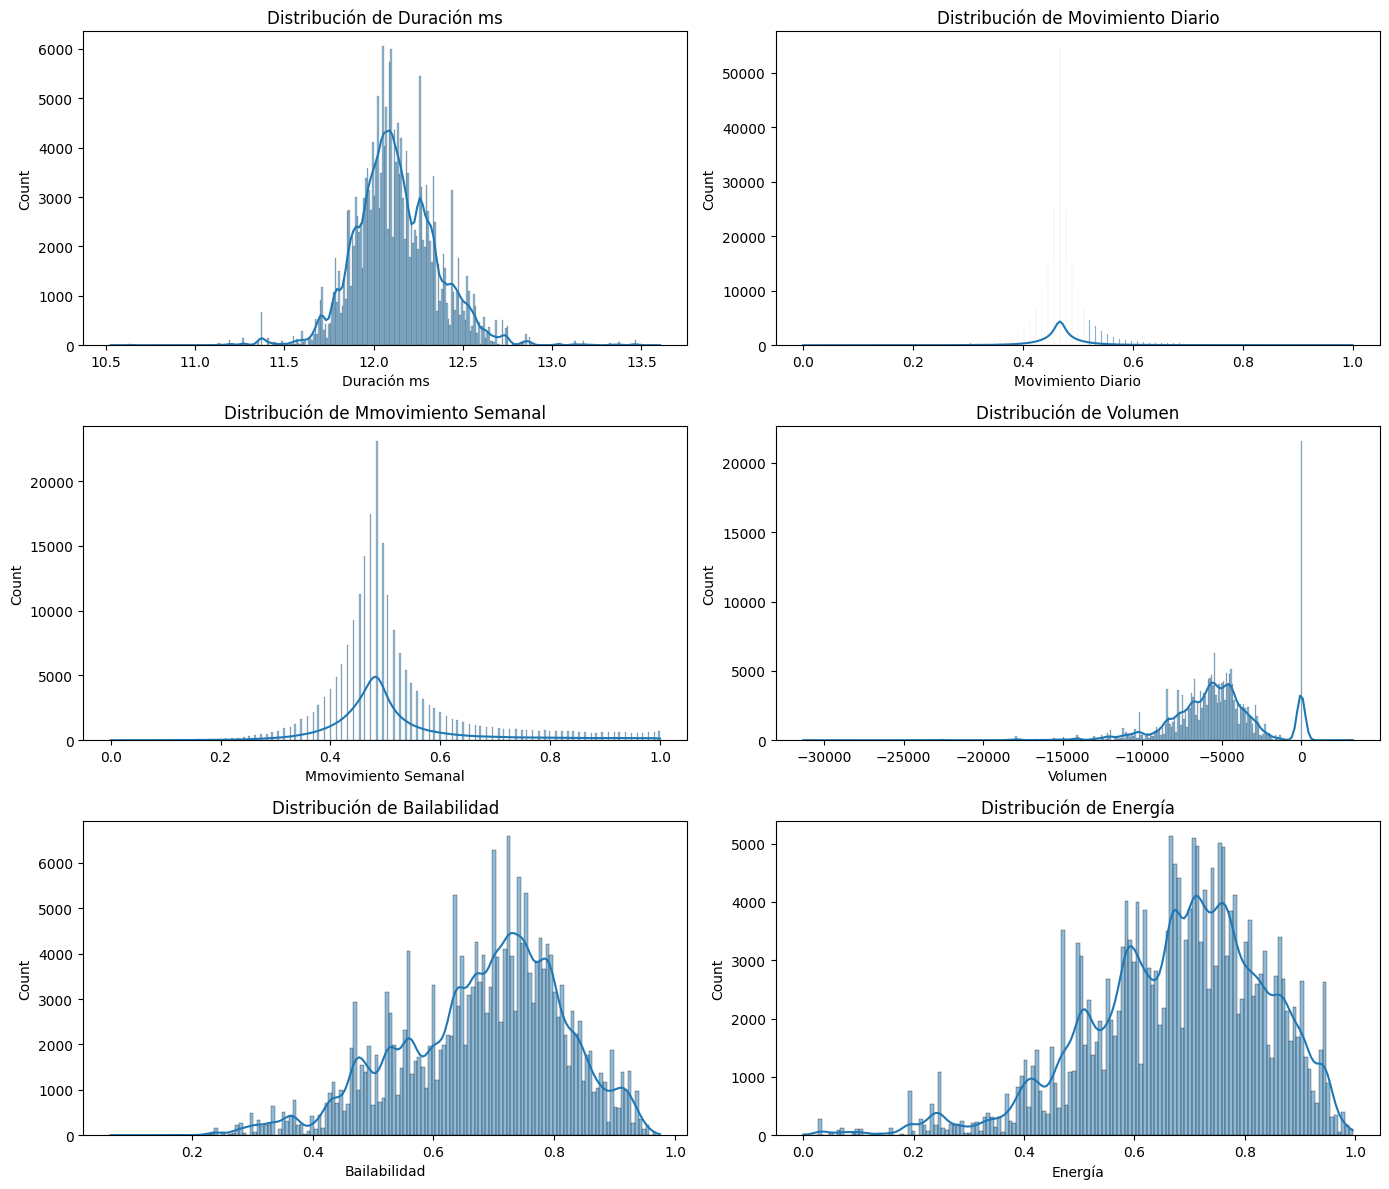

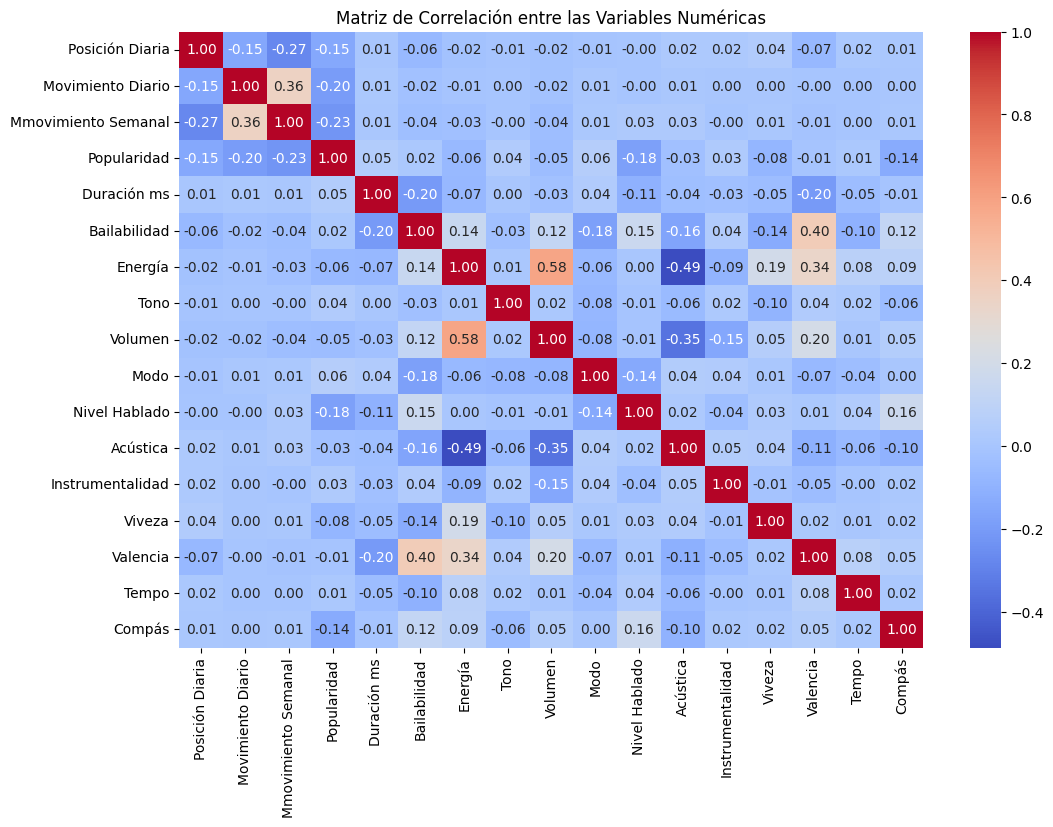

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


scaler = MinMaxScaler()


df['Movimiento Diario'] = scaler.fit_transform(df[['Movimiento Diario']])
df['Mmovimiento Semanal'] = scaler.fit_transform(df[['Mmovimiento Semanal']])



if df['Duración ms'].skew() > 1:
    df['Duración ms'] = df['Duración ms'].clip(lower=1e-5)
    df['Duración ms'] = np.log1p(df['Duración ms'])



fig, axes = plt.subplots(3, 2, figsize=(14, 12))


variables_para_graficar = ['Duración ms', 'Movimiento Diario', 'Mmovimiento Semanal', 'Volumen', 'Bailabilidad', 'Energía']

for i, var in enumerate(variables_para_graficar):
    sns.histplot(df[var], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set(title=f'Distribución de {var}')

plt.tight_layout()
plt.show()


variables_numericas = df.select_dtypes(include=[np.number]).columns


correlacion = df[variables_numericas].corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación entre las Variables Numéricas')
plt.show()



In [ ]:

variables_normalizadas = ['Bailabilidad', 'Energía', 'Tono', 'Modo', 'Nivel Hablado', 'Acústica', 'Instrumentalidad', 'Viveza']


fig, axes = plt.subplots(4, 2, figsize=(14, 14))

for i, var in enumerate(variables_normalizadas):
    sns.histplot(df[var], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set(title=f'Distribución de {var}')

plt.tight_layout()
plt.show()


fig, axes = plt.subplots(4, 2, figsize=(14, 14))

for i, var in enumerate(variables_normalizadas):
    sns.boxplot(x=df[var], ax=axes[i//2, i%2], color='lightblue')
    axes[i//2, i%2].set(title=f'Boxplot de {var}')

plt.tight_layout()
plt.show()


correlacion_normalizadas = df[variables_normalizadas].corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlacion_normalizadas, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación entre Variables Normalizadas')
plt.show()


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x78ab03278f40> (for post_execute):


KeyboardInterrupt: 